# Modeling and Simulation 5 - Advanced Monte Carlo Methods

## Monte Carlo Tree Search: MiniMax with MCTS

Monte Carlo Tree Search (MCTS) is a heuristic search algorithm that is often used in artificial intelligence for games and decision-making problems. The algorithm works by iteratively building a search tree to represent the possible outcomes of a game or decision problem, and then simulating a large number of random plays or trials from each node in the tree to estimate the probability of winning or losing from that position. The algorithm then uses these estimates to select the best move or decision.

The basic steps of the MCTS algorithm are as follows:

1. Selection: Starting from the root node of the search tree, the algorithm navigates down the tree by selecting nodes that have not been fully explored yet. The selection process usually follows a heuristic based on the Upper Confidence Bound for Trees (UCT) formula, which balances the exploitation of promising nodes with the exploration of less visited nodes.

2. Expansion: Once a non-terminal node is selected, the algorithm expands it by adding one or more child nodes that represent possible moves or decisions from that position.

3. Simulation: The algorithm then performs a random playout or simulation from the newly expanded node until the end of the game or decision problem. The simulation may be guided by a default policy or heuristic that selects moves or decisions randomly or based on some rule of thumb.

4. Backpropagation: After the simulation is complete, the algorithm updates the statistics of all nodes that were visited during the selection and expansion phases. Specifically, it increments the visit count of each node by one and updates its win count or reward based on the outcome of the simulation. The updates are propagated up the tree until the root node is reached.

5. Repeat: The algorithm repeats steps 1-4 for a fixed number of iterations or until some stopping criterion is met, such as a time limit or a budget on the number of simulations.

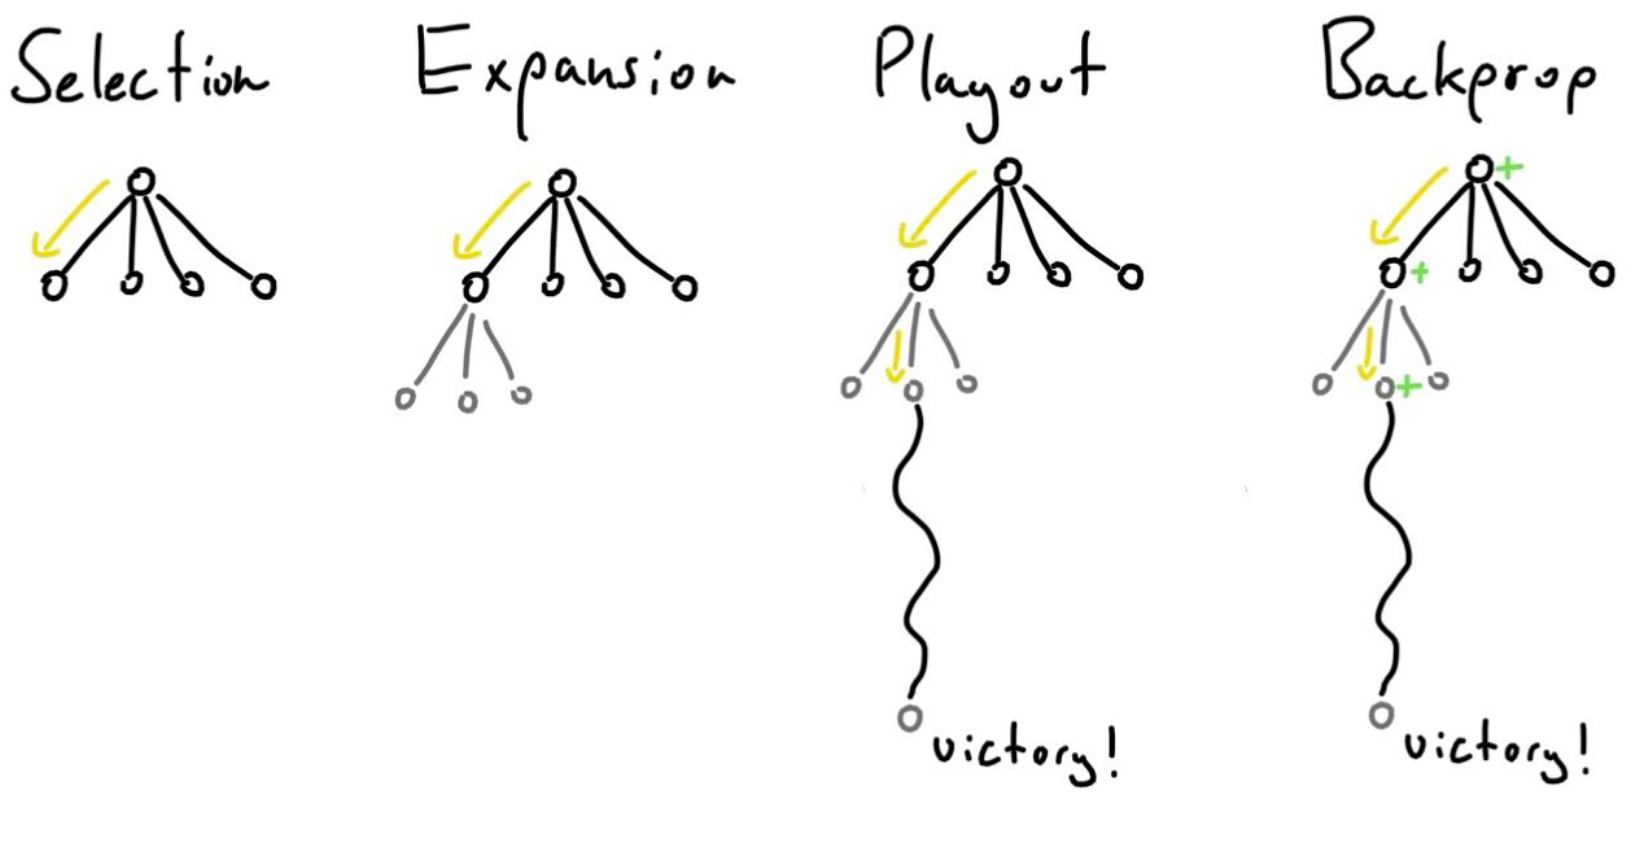

The output of the MCTS algorithm is usually the move or decision that leads to the child node with the highest estimated probability of winning or success. However, the algorithm can also be used to estimate other statistics, such as the expected value or variance of the outcome, or to generate a distribution over all possible moves or decisions.

MCTS has been successfully applied to a variety of games and decision problems, such as Go, chess, poker, and robotics planning. It is particularly useful in problems where the search space is large or complex, and where the optimal solution cannot be found by exhaustive search or traditional heuristic methods.

To reduce the search space, in the selection step, MCTS uses a heuristic function called the Upper Confidence Bound for Trees ([UCT in chess programming](https://www.chessprogramming.org/UCT)) to balance the exploitation of promising nodes with the exploration of less visited nodes. The UCT formula evaluates the quality of each node based on two factors: its average reward or win rate, and its degree of exploration or visit count. Specifically, the formula selects the child node that maximizes the sum of these two factors, with a trade-off parameter that controls the balance between exploitation and exploration. By selecting the most promising nodes, MCTS focuses its attention on the parts of the search tree that are most likely to lead to a good outcome.

In the simulation step, MCTS uses a random playout or simulation to estimate the probability of winning or losing from a particular node. The simulation may be guided by a default policy or heuristic that selects moves or decisions randomly or based on some rule of thumb. By simulating a large number of random plays from each node, MCTS builds up a statistical estimate of the quality of each node, which can be used to guide future selection and expansion.

The combination of node selection and simulation steps allows MCTS to reduce the search space by avoiding the exploration of unpromising nodes and focusing on the parts of the tree that are most likely to lead to a good outcome. The algorithm achieves this reduction in search space by dynamically adjusting its focus based on the information it has gathered during the search. As more simulations are performed and more information is gathered, the algorithm gradually converges to a more accurate estimate of the quality of each node, which allows it to make more informed decisions about which nodes to select and expand in the future.

Monte Carlo Tree Search (MCTS) has been widely used in game-playing AI, particularly in combination with MiniMax algorithms. MiniMax algorithms aim to find the optimal move in a two-player, zero-sum game by exploring all possible moves up to a certain depth and assigning a value to each possible move based on a heuristic evaluation function.

The main advantage of MCTS in combination with MiniMax algorithms is that it helps to reduce the search space by focusing on the most promising moves. MCTS uses a tree-based data structure to represent the game state and gradually expands the tree by simulating random games from each node. The algorithm then backpropagates the results of these simulations up the tree, updating the statistics of each node, such as the number of times it has been visited and the number of wins and losses.

By using MCTS to guide the search, the MiniMax algorithm can focus on the most promising nodes in the tree, rather than exploring all possible moves up to a certain depth. This can greatly reduce the number of nodes that need to be evaluated, making the algorithm more efficient and effective. Additionally, MCTS can also help the MiniMax algorithm to handle games with large branching factors or games with incomplete information, which can be difficult for traditional MiniMax algorithms to handle.

Within this implementation, we will use the UCB1 formula to balance the rate of exploitation vs exploration. UCB1 is a way to balance the exploitation of the current best option and exploration of new options in multi-armed bandit problems. It is commonly used in the selection step of MCTS algorithm.

The UCB1 formula is defined as: `score = (total rewards of the arm / number of times the arm was selected) + c * sqrt(log(total number of times all arms were selected) / number of times the arm was selected)`

In [50]:
import random
import chess
import math

# Nothing to do here :)
class Node:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = []
        self.visits = 0
        self.score = 0

    # This function is used to select the child node that should be explored next in the Monte Carlo Tree Search algorithm.
    # It takes an exploration parameter as input and returns the child node with the highest 
    # score according to a formula that balances exploration and exploitation.
    def select_child(self, exploration_param):
        best_score = float('-inf')
        best_child = None
        for child in self.children:
            if child.visits == 0:
                score = float('inf')
            else:
                score = child.score / child.visits + exploration_param * \
                    math.sqrt(math.log(self.visits) / child.visits)
            if score > best_score:
                best_score = score
                best_child = child
        return best_child

    # This function is used to expand the current node by adding child nodes to it. 
    # It does this by generating a list of legal moves for the current state, 
    # creating a new state for each move, and then creating a new child node for each new state.
    def expand(self):
        legal_moves = list(self.state.legal_moves)
        for move in legal_moves:
            new_state = self.state.copy()
            new_state.push(move)
            self.children.append(Node(new_state, parent=self))

    # This function is used to update the statistics of a node based on the result of a simulation. 
    # It increases the visit count of the node by one and adds the score of the simulation to the total score of the node.
    def update(self, score):
        self.visits += 1
        self.score += score

In [59]:
class MCTS:
    def __init__(self, exploration_param=1.4, max_iterations=1000):
        self.exploration_param = exploration_param
        self.max_iterations = max_iterations
        self.piece_values = {
            chess.PAWN: 1,
            chess.KNIGHT: 3,
            chess.BISHOP: 3,
            chess.ROOK: 5,
            chess.QUEEN: 9,
            chess.KING: 100
        }

    # TODO your evaluation function
    # Hint: For a simple evaluation function, set an extremely high value for checkmate, add the values of your pieces and subtract the values of the adversary's pieces
    # Hint 2: You need to keep in mind that when black plays, the score should be inverted
    def evaluate(self, board):
        return 0

    # This is the main function of the MCTS algorithm. It takes in the current state of the game and runs the Monte Carlo tree search algorithm
    # to find the best move to make.
    def search(self, state):
        # Initialize the root of your search tree with the given state
        root = Node(state)
        
        # Max iterations will determine how many children will be explored by this search
        for i in range(self.max_iterations):
            # TODO Select a child node to explore based on the UCB1 formula (use the select_child method)
            node = root
            # TODO You should check if the node has been previously visited, if not, expand it
            # TODO Simulate a game that starts from the chosen node, update the node, and backpropagate the score update until you reach the root
        # TODO select the best child (that has the highest score)
        best_child = None
        # Returns the state of the game for the best outcome
        return best_child.state

    # This function is used by the MCTS algorithm to simulate a game from a given state.
    def simulate(self, state):
        # TODO Play a random series of moves and return the evaluation of the final state.
        return 0

In [60]:
class MiniMaxMCTS:
    def __init__(self, depth=3, exploration_param=1.4, max_iterations=1000):
        self.depth = depth
        self.exploration_param = exploration_param
        self.max_iterations = max_iterations
        self.piece_values = {
            chess.PAWN: 1,
            chess.KNIGHT: 3,
            chess.BISHOP: 3,
            chess.ROOK: 5,
            chess.QUEEN: 9,
            chess.KING: 100
        }

    # TODO You can use the same evaluation function as above, or you can do something more complex here
    def evaluate(self, board):
        return 0

    # The main function of the MiniMax with MCTS algorithm, gets a state and returns the best move to play from that state
    def search(self, state):
        best_move = None
        best_score = float('-inf')
        legal_moves = list(state.legal_moves)
        mcts = MCTS(exploration_param=self.exploration_param, max_iterations=self.max_iterations)

        for move in legal_moves:
            # TODO Create a new state with the current move and search for the best state using MCTS
            new_state = state.copy()
            # TODO Get the minimum score that can be achieved from that state
            # TODO Update the best score if the minimum score that can be achieved is better than the last one
        return best_move

    # This function represents the perspective of the maximizing player
    # and recursively computes the maximum possible score that player 
    # can achieve by assuming the minimizing player will play optimally.
    def max_value(self, state, depth):
        # TODO The stopping condition: max depth reached or checkmate. Return the value of the state.
        value = float('-inf')
        legal_moves = list(state.legal_moves)
        # TODO Get the maximum value that can be achieved assuming the minimizing player plays optimally.
        # Hint: Keep in mind that `state` would be passed by reference.
        return value

    # This function represents the perspective of the minimizing player 
    # and recursively computes the minimum possible score that player 
    # can achieve by assuming the maximizing player will play optimally.
    def min_value(self, state, depth):
        # TODO The stopping condition: max depth reached or checkmate. Return the value of the state.
        value = float('inf')
        legal_moves = list(state.legal_moves)
        # TODO Get the minimum value that can be achieved assuming the maximizing player plays optimally.
        # Hint: Keep in mind that `state` would be passed by reference.
        return value

This is the Tricky Queen Triangulation puzzle: 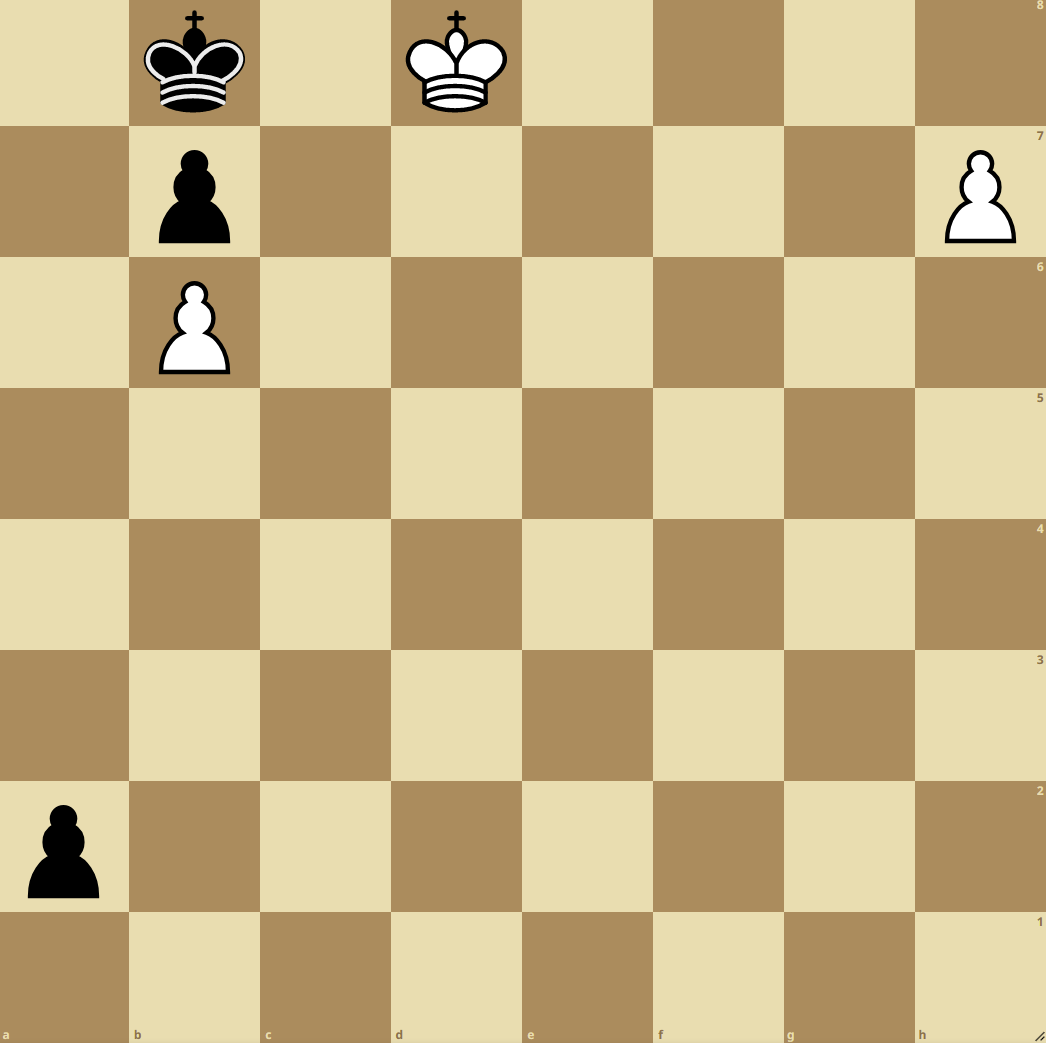 You can try it out yourself [here](https://lichess.org/study/Mcbl0Kap). 

The TL;DR is that h7h8q is the winning move.

In [58]:
# Create a MiniMaxMCTS object with a depth of 14, exploration parameter of 8, and max iterations of 1000
algo = MiniMaxMCTS(depth=14, exploration_param=8, max_iterations=1000)

# Create a chess board object for the Tricky Queen Triangulation puzzle setup by D. Joseph. This puzzle requires 13 moves to get the checkmate.
board = chess.Board(f"1k1K4/1p5P/1P6/8/8/8/p7/8 w - - 0 1")

# Use the MiniMaxMCTS algorithm to select the best move for the starting position
best_move = algo.search(board)

# Print the best move
print("Best move: ", best_move.uci())

Best move:  h7h8n


Note: due to its nature, MCTS is highly dependant on the evaluation function, number of iterations and exploration parameter. This may lead to erroneous results, since the winning series of moves may never be explored. Try running multiple times if h7h8q is not the move selected by your implementation.